# Assignment 1 - Rhythm Generator
### Mariella Daghfal, Kaede Johnson, Shayan Khajehnouri, & Tahel Singer

In [6]:
# to be safe i personally created venv with anaconda terminal.
# conda create -n "digital_musicology" python=3.8
# conda activate digital_musicology
# conda install pip

In [7]:
## Dependencies
# pip install music21
# pip install tqdm
# pip install pandas
from music21 import *
from tqdm import *
import pandas as pd
import numpy as np
import collections

## for viewing score, download and install finale note pad at https://store.makemusic.com/Downloads/Default.aspx?id=538&_ga=2.3616692.58482559.1678537005-1850486829.1678537005 and then run:
# configure.run()

## I don't know if it's because I screwed up something during initial setup but this is what I had to do to get music showing:
# environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\Finale NotePad 2012\\Finale NotePad.exe')

In [8]:
## Bach score from package

s = corpus.parse('bach/bwv65.2.xml')

# Print music12 object to show it worked
# s.show('text')

# image version (ideally this is inline but i can't get that working; for me it pulls open finale note pad with the sheet music in a separate window)
# s.show()

In [9]:
## Load scores into corpus
# Be sure to modify folder path below
# Excludes scores that aren't strictly 3/4 meter all the way through (only 15 / 600)

import os
import tqdm
slangpolska_scores = {}
excluded = 0
# CHANGE FOLDER BELOW TO LOCATION OF XML FILES. Download xml folders from https://github.com/DCMLab/music-generation-challenge-2021/tree/main/data
xml_file_location = 'C:/Users/HP/anaconda3/envs/digital_musicology/xml/'
scores_xml = os.listdir(xml_file_location)
for si in trange(len(scores_xml)):
    if scores_xml[si] != 'conversion.log':
        tmp = converter.parse(xml_file_location + scores_xml[si])
        tmp_meters = tmp.recurse().getElementsByClass(meter.TimeSignature)
        if len(tmp_meters) != 1 or tmp_meters[0].ratioString != '3/4':
            print('excluding ' + scores_xml[si] + '. ' + str(len(tmp_meters)) + ' meter(s), first is ' + tmp_meters[0].ratioString)
            excluded += 1
        else:
            slangpolska_scores[scores_xml[si]] = tmp

print('Imported ' + str(len(slangpolska_scores)) + ' scores into corpus. Excluded ' + str(excluded) + ' due to inconsistent meter.')


  6%|▌         | 33/600 [00:00<00:12, 46.06it/s]

excluding Ninas_slängpolska_20240b.xml. 2 meter(s), first is 3/4


 23%|██▎       | 136/600 [00:03<00:08, 54.89it/s]

excluding Poloness_ur_Andreas_Hööks_notbok_cae293.xml. 4 meter(s), first is 2/2
excluding Polonoise_92b598.xml. 2 meter(s), first is 3/4


 47%|████▋     | 280/600 [00:07<00:11, 26.90it/s]

excluding Polonäs_i_Dm_efter_Daniel_Danielsson_ac3754.xml. 2 meter(s), first is 3/4


 53%|█████▎    | 319/600 [00:08<00:06, 40.86it/s]

excluding Polonäs_sexdregasamlingen_del_3_nr_1_d8c3dc.xml. 2 meter(s), first is 3/4


 64%|██████▍   | 385/600 [00:11<00:05, 41.82it/s]

excluding Polska_efter_Wesslén_bec4ac.xml. 2 meter(s), first is 3/4
excluding Polska_efter_Wesslén_ce0449.xml. 2 meter(s), first is 3/4
excluding Polska_efter_Wesslén_fc5278.xml. 2 meter(s), first is 3/4


 66%|██████▌   | 397/600 [00:11<00:04, 49.01it/s]

excluding Polska_från_Västergötland_4b64d8.xml. 3 meter(s), first is 3/4


 71%|███████   | 425/600 [00:12<00:08, 21.10it/s]

excluding Sydjämtsk_slängpolska_efter_JohnErik_Mattsson_2a0874.xml. 2 meter(s), first is 3/4


 80%|████████  | 480/600 [00:13<00:02, 44.74it/s]

excluding _Polonäs_sexdregasamlingen_del_1_nr_36_dfc2c9.xml. 2 meter(s), first is 3/4
excluding _Polonäs_sexdregasamlingen_del_1_nr_36_ed2b21.xml. 2 meter(s), first is 3/4


 94%|█████████▍| 565/600 [00:16<00:01, 31.52it/s]

excluding _Polska_efter_Gustav_Strutz_21bb05.xml. 5 meter(s), first is 3/4
excluding _Polska_efter_Gustav_Strutz_5b7324.xml. 5 meter(s), first is 3/4


 99%|█████████▉| 595/600 [00:16<00:00, 44.67it/s]

excluding _Polska_Kringellåt_efter_Snickar_Erik_985b63.xml. 3 meter(s), first is 4/4


100%|██████████| 600/600 [00:16<00:00, 35.37it/s]

Imported 584 scores into corpus. Excluded 15 due to inconsistent meter.


In [10]:
# Investigate one score to get familiar with music21
sample_score = slangpolska_scores['_1814_698087.xml']
print('music21 object for imported score is called ' + str(type(sample_score)))
#print('sample score key is ' + str(sample_score.analyze('key')))
print('The first time signature object is ' + sample_score.recurse().getElementsByClass(meter.TimeSignature)[0].ratioString)
print('There is (are) ' + str(len(sample_score.recurse().getElementsByClass(meter.TimeSignature))) + ' time signature object(s)')
print('Measure 6 does not have a time signature object: ' + str(sample_score.measure(6).timeSignature is None))
print('Recall the sample score is in time ' + sample_score.recurse().getElementsByClass(meter.TimeSignature)[0].ratioString)
curr_measure = 0
for i in sample_score.recurse().notes:
    if i.measureNumber != curr_measure:
        curr_measure = i.measureNumber
        print("Measure " + str(curr_measure))
    print('Beat: ' + str(i.beat) + ', Duration: ' + str(i.duration.quarterLength) + ', Pitch: ' + str(i.name) + ', Accents: ' + str(i.articulations))
print('Music21 object print:')
sample_score.show('text')

music21 object for imported score is called <class 'music21.stream.base.Score'>
The first time signature object is 3/4
There is (are) 1 time signature object(s)
Measure 6 does not have a time signature object: True
Recall the sample score is in time 3/4
Measure 1
Beat: 1.0, Duration: 0.5, Pitch: D, Accents: []
Beat: 1.5, Duration: 0.5, Pitch: C, Accents: []
Beat: 2.0, Duration: 1.0, Pitch: B, Accents: []
Beat: 3.0, Duration: 1.0, Pitch: G, Accents: []
Measure 2
Beat: 1.0, Duration: 0.5, Pitch: C, Accents: []
Beat: 1.5, Duration: 0.5, Pitch: B, Accents: []
Beat: 2.0, Duration: 1.0, Pitch: A, Accents: []
Beat: 3.0, Duration: 1.0, Pitch: D, Accents: []
Measure 3
Beat: 1.0, Duration: 0.75, Pitch: G, Accents: []
Beat: 1.75, Duration: 0.25, Pitch: F#, Accents: []
Beat: 2.0, Duration: 0.5, Pitch: G, Accents: []
Beat: 2.5, Duration: 0.5, Pitch: A, Accents: []
Beat: 3.0, Duration: 0.5, Pitch: B, Accents: []
Beat: 3.5, Duration: 0.5, Pitch: C, Accents: []
Measure 4
Beat: 1.0, Duration: 0.5, Pitc

In [11]:
from collections import Counter
total_note_count = 0
total_accents = 0
total_scores_w_accents = 0
articulations = []
for i, score in enumerate(slangpolska_scores):
    fresh_score = 1
    for note in slangpolska_scores[score].recurse().notesAndRests:
        total_note_count += 1
        if len(note.articulations) > 0:
            total_accents += len(note.articulations)
            articulations.append(note.articulations)
            if fresh_score == 1:
                total_scores_w_accents += 1
                fresh_score = 0
flat_articulations = [artic.name for sublist in articulations for artic in sublist]
accent_shares = collections.Counter(flat_articulations).most_common(10)
for i in range(len(accent_shares)):
    accent_shares[i] = (accent_shares[i][0], accent_shares[i][1] / total_note_count)
print("Shares of scores with accents")
print(total_scores_w_accents / len(slangpolska_scores.keys()))
print("Share of notes with certain accent type")
print(accent_shares)


Shares of scores with accents
0.08561643835616438
Share of notes with certain accent type
[('staccato', 0.009076193779627702), ('tenuto', 0.00047693374956642387), ('down bow', 0.00046248121170077463), ('staccatissimo', 0.0003613134466412302), ('accent', 0.00023124060585038732), ('up bow', 0.00023124060585038732), ('open string', 0.00010116776505954446), ('stopped', 7.226268932824603e-05)]


In [12]:
# Tokenization
# Starting simple until we define rhythm. Tokens will simply be location of beat in measure (that is, first element in Beat: , Duration: , Pitch: printout sequence above)
# First, observe where beats can occur (also sneakily multiply beat timings by 12 because see output + explanation in next cell)
import collections
all_beats = []
for score in slangpolska_scores:
    if (slangpolska_scores[score].recurse().notes[-1].measureNumber >= 4): # and (slangpolska_scores[score].recurse().notes[0].beat == 1):
        for note in slangpolska_scores[score].recurse().notesAndRests:
            all_beats.append(float(note.beat) + (3 * (note.measureNumber-1)))
note_placements = collections.Counter(all_beats).most_common(100)
location = []
frequency = []
for i,tuple in enumerate(note_placements):
    try:
        if np.isnan(float((tuple[0]))) == False:
            location.append(float((tuple[0])))
            frequency.append(tuple[1])
    except:
        print(tuple[0])

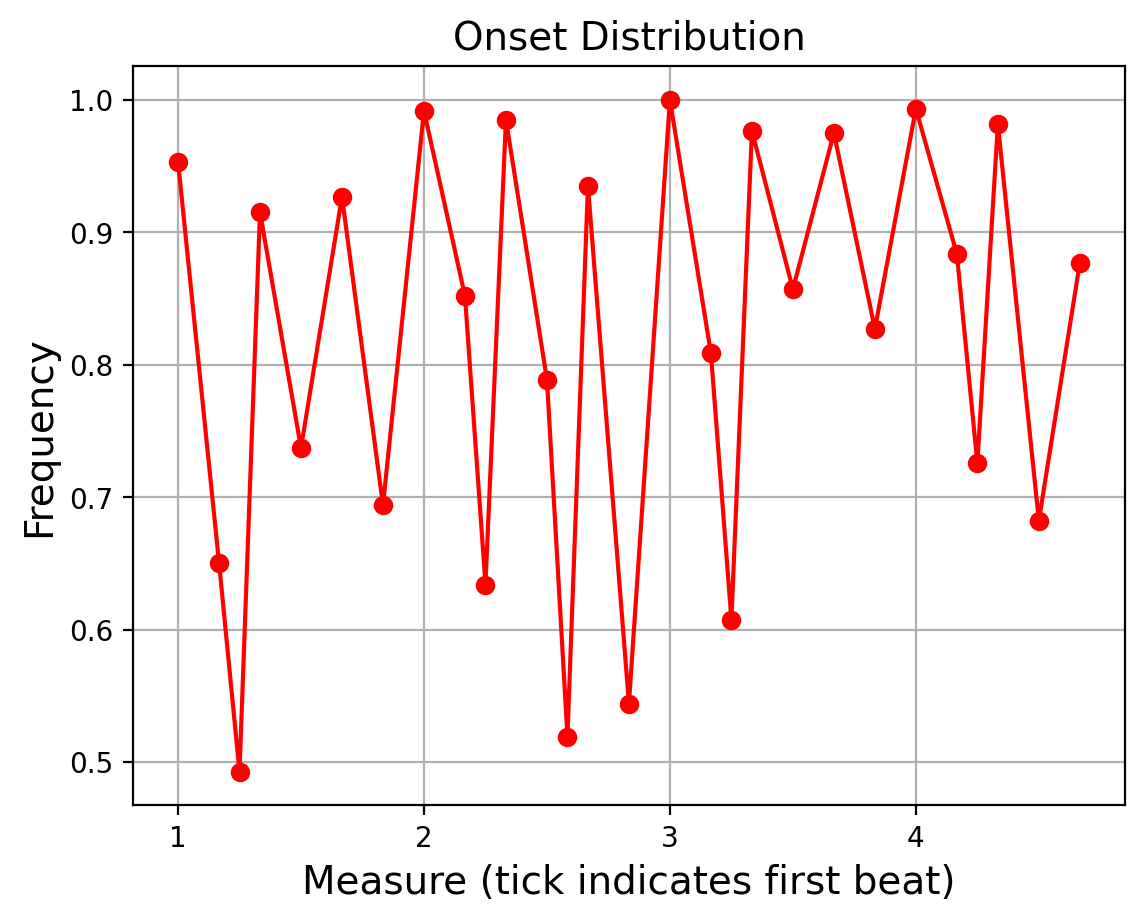

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
max_frequency = max(frequency)
onset_distribution = pd.DataFrame(list(zip(location, frequency)),
               columns =['atomic_moment', 'frequency'])
onset_distribution['frequency'] = onset_distribution['frequency'] / max_frequency
onset_distribution = onset_distribution.sort_values(by='atomic_moment')
onset_distribution = onset_distribution[onset_distribution['atomic_moment'] <= 12]
plt.plot(onset_distribution['atomic_moment'], onset_distribution['frequency'], color='red', marker='o')
plt.title('Onset Distribution', fontsize=14)
plt.xlabel('Measure (tick indicates first beat)', fontsize=14)
plt.xticks([1, 4, 7, 10], ['1','2','3','4'])
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [28]:
import music21
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import random

def chronotonic_comparison(score_name_w_xml_1, score_name_w_xml_2, subset_start = -1, show_graphs = False):
    final_measure_1 = slangpolska_scores[score_name_w_xml_1].recurse().notesAndRests[-1].measureNumber
    final_measure_2 = slangpolska_scores[score_name_w_xml_2].recurse().notesAndRests[-1].measureNumber
    final_measure_for_subset = final_measure_1
    if final_measure_2 < final_measure_for_subset:
        final_measure_for_subset = final_measure_2
    if (final_measure_for_subset < 8) or (final_measure_for_subset < (subset_start + 7)):
        print("ONE OF THE SCORES IS TOO SHORT")
        return "ONE OF THE SCORES IS TOO SHORT"
    if subset_start == -1:
        while True:
            subset_start = random.randint(1, (final_measure_for_subset - 8)+1)
            if subset_start%2 != 0:
                break
    else:
        # subset start passed in
        pass
    chrono1, xvals1, yvals1, xticks1, xlabs1 = chronotonic_builder(score_name_w_xml_1, subset_start, show_graphs)
    chrono2, xvals2, yvals2, xticks2, xlabs2 = chronotonic_builder(score_name_w_xml_2, subset_start, show_graphs)
    maxyvals = max(yvals1)
    if maxyvals < max(yvals2):
        maxyvals = max(yvals2)
    linspaced_subsets = pd.DataFrame(list(zip(xvals1, yvals1, xvals2, yvals2)), columns=['score1_xvals', 'score1_yvals', 'score2_xvals', 'score2_yvals'])
    linspaced_subsets['x_diff'] = linspaced_subsets['score1_xvals'] - linspaced_subsets['score2_xvals']
    linspaced_subsets['y_diff'] = abs(linspaced_subsets['score1_yvals'] - linspaced_subsets['score2_yvals'])
    if show_graphs == True:
        fig, ax = plt.subplots()
        bar_plot = ax.bar(chrono1['onsets'], chrono1['heights'], width=chrono1['bin_widths'], align='edge', alpha = .3) # edgecolor='black'
        bar_plot = ax.bar(chrono2['onsets'], chrono2['heights'], width=chrono2['bin_widths'], align='edge', color='red', alpha = .3) # edgecolor='black'
        ax.set_ylabel("Note Length")
        ax.set_xlabel("Measure # (Tick Indicates First Beat of Measure)")
        plt.title("Chronotonic sequence overlap (random 8-bar subset)")
        plt.plot(xvals1, yvals1, 'blue', alpha = 0.9)
        plt.plot(xvals2, yvals2, 'red', alpha = 0.9)
        plt.xticks(xticks1, xlabs1)
        plt.ylim([0,maxyvals+0.25])
        plt.show()
        plt.figure()
        plt.plot(linspaced_subsets['score1_xvals'],linspaced_subsets['y_diff'],color='black')
        maxdiff = max(linspaced_subsets['y_diff'])
        plt.xticks(xticks1, xlabs1)
        plt.ylim([0,maxdiff+0.25])
        plt.ylabel('Difference in Note Length')
        plt.xlabel('Measure # (Tick Indicates First Beat of Measure)')
        x_axis = np.linspace(xticks1[0], xticks1[-1], 10000, endpoint=True)
        plt.fill_between(x_axis, linspaced_subsets['y_diff'], color='black', alpha = .3)
        plt.title("Absolute Difference in Chronotonic Sequence")
        plt.show()
    #print(pd.DataFrame(list(zip(chrono1['onsets'],chrono2['onsets'])),columns=('chrono1_onsets','chrono2_onsets')))
    return np.trapz(linspaced_subsets['y_diff'], linspaced_subsets['score1_xvals'])
    #return linspaced_subsets
    
def chronotonic_builder(score_name_w_xml, subset_start=1, show_graphs = False):
    onsets = []
    heights = []
    final_measure = slangpolska_scores[score_name_w_xml].recurse().notesAndRests[-1].measureNumber
    for n_or_r in slangpolska_scores[score_name_w_xml].recurse().notesAndRests:
        #print(n_or_r, n_or_r.beat + (3 * (n_or_r.measureNumber-1)), n_or_r.duration.quarterLength)
        onsets.append(n_or_r.beat + (3 * (n_or_r.measureNumber-1)))
        if isinstance(n_or_r, music21.note.Note):
            heights.append(n_or_r.duration.quarterLength)
        else:
            heights.append(float(0))
    x = np.asarray(onsets)
    y = np.asarray(heights)
    if show_graphs == True:
        fig, ax = plt.subplots()
        bar_plot = ax.bar(x, y, width=y, align='edge', edgecolor='black') # width=bin_width
        ax.set_ylabel("Note Length")
        ax.set_xlabel("Measure (tick indicates first beat)")
        x_tick_locs = np.arange(1, final_measure*3, 3).tolist()
        x_tick_labels = [str(int(((x-1)/3)+1)) for x in x_tick_locs]
        #print(x_tick_locs, x_tick_labels)
        plt.xticks(x_tick_locs, x_tick_labels)
        plt.title("Full chronotonic sequence: " + score_name_w_xml)
        plt.show()

    # Now display a random subset
    chronotonic_start = subset_start
    chronotonic_end = chronotonic_start + 8
    filter_arr_start = (x >= (3*(chronotonic_start-1))+1)

    chrono_sequence = pd.DataFrame(list(zip(filter_arr_start.tolist(), x.tolist(), y.tolist())), columns=['filter_start','onsets','heights'])
    chrono_sequence = chrono_sequence[chrono_sequence['onsets'] < ((3*(chronotonic_end-1))+1)]
    first_index = chrono_sequence.index[chrono_sequence['filter_start'] == True].tolist()[0]
    if first_index != 0:
        chrono_sequence = chrono_sequence[first_index-1:]
        #print(first_index, chrono_sequence)
        if int(chrono_sequence['onsets'].tolist()[1]) == int((3*(chronotonic_start-1))+1):
            chrono_sequence = chrono_sequence[1:]
        else:
            chrono_sequence.at[0,'onsets'] = (3*(chronotonic_start-1))+1
    else:
        chrono_sequence = chrono_sequence[first_index:]
    chrono_sequence['bin_widths'] = chrono_sequence.diff(periods=-1)['onsets']*-1
    chrono_sequence.at[chrono_sequence.iloc[-1].name,'bin_widths'] = ((3*(chronotonic_end-1))+1) - chrono_sequence['onsets'].tolist()[-1]
    
    # Pulled out of if statement so they can be passed to comparison graph
    x_tick_locs = np.arange((3*(chronotonic_start-1))+1, (3*(chronotonic_end-1))+2, 3).tolist()
    x_tick_labels = [str(int(((x-1)/3)+1)) for x in x_tick_locs]
    if show_graphs == True:
        fig, ax = plt.subplots()
        bar_plot = ax.bar(chrono_sequence['onsets'], chrono_sequence['heights'], width=chrono_sequence['bin_widths'], align='edge', edgecolor='black', alpha = .5) # width=bin_width
        ax.set_ylabel("Note Length")
        ax.set_xlabel("Measure (tick indicates first beat)")
        #x_tick_locs = np.arange((3*(chronotonic_start-1))+1, (3*(chronotonic_end-1))+2, 3).tolist()
        #x_tick_labels = [str(int(((x-1)/3)+1)) for x in x_tick_locs]
        plt.xticks(x_tick_locs, x_tick_labels)
        plt.title("Chronotonic sequence subset")

    # Add interpolated version, to be used in difference calculations
    onsets_list = chrono_sequence['onsets'].tolist()
    heights_list = chrono_sequence['heights'].tolist()
    x_for_interp = []
    y_for_interp = []
    for i,x in enumerate(onsets_list):
        if i != 0:
            x_for_interp.append(onsets_list[i-1])
            y_for_interp.append(heights_list[i-1])
            x_for_interp.append(onsets_list[i]-.000001)
            y_for_interp.append(heights_list[i-1])
    x_for_interp.append(onsets_list[-1])
    y_for_interp.append(heights_list[-1])
    xvals = np.linspace((3*(chronotonic_start-1))+1, (3*(chronotonic_end-1))+1, 10000)
    yinterp = np.interp(xvals, x_for_interp, y_for_interp)
    if show_graphs == True:
        plt.plot(xvals, yinterp, 'blue')
        plt.show()
    return chrono_sequence, xvals, yinterp, x_tick_locs, x_tick_labels

16 10


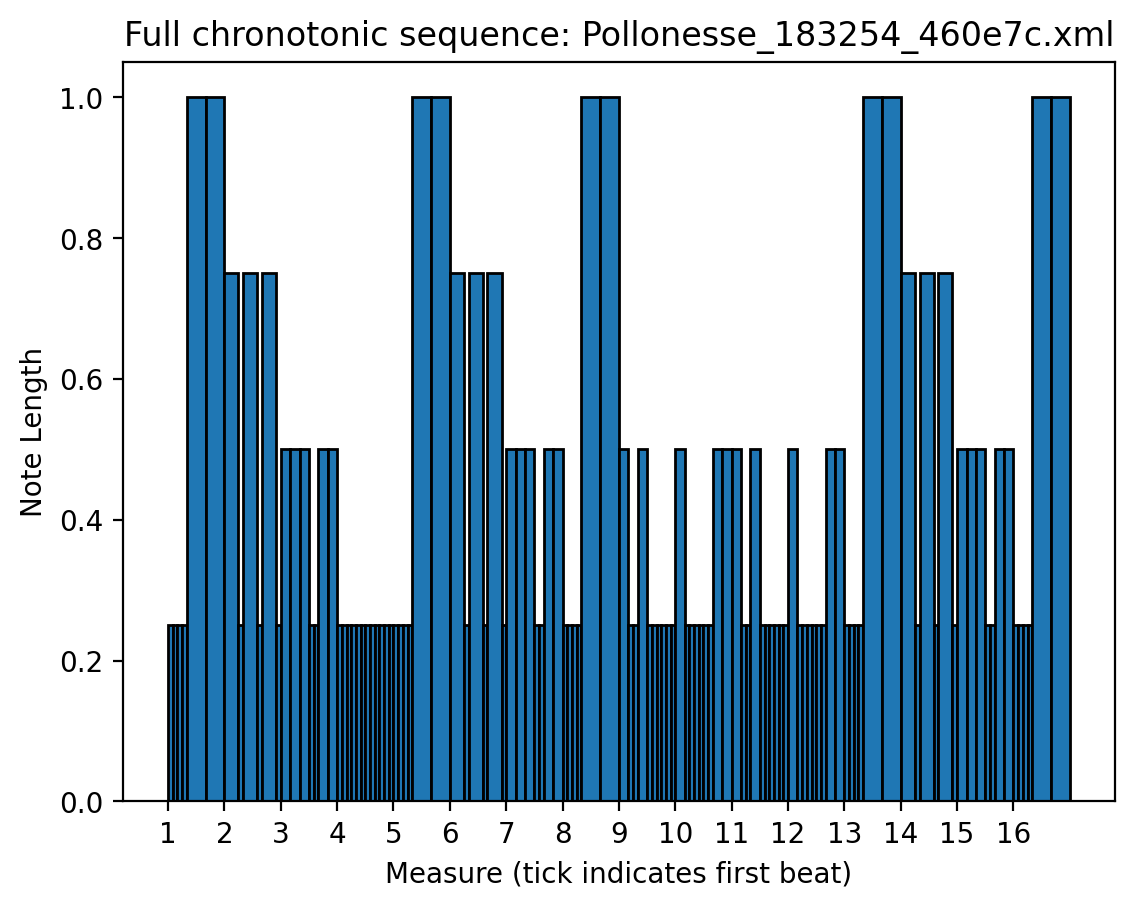

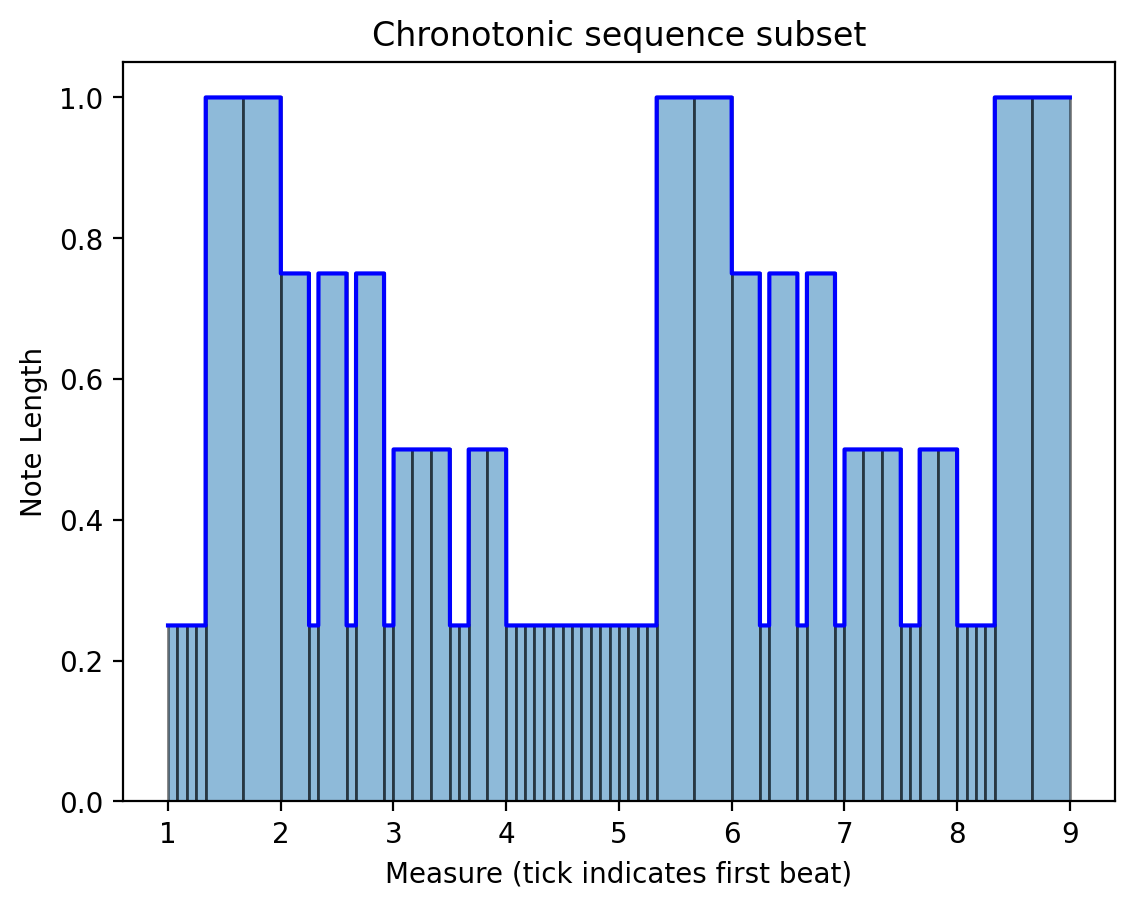

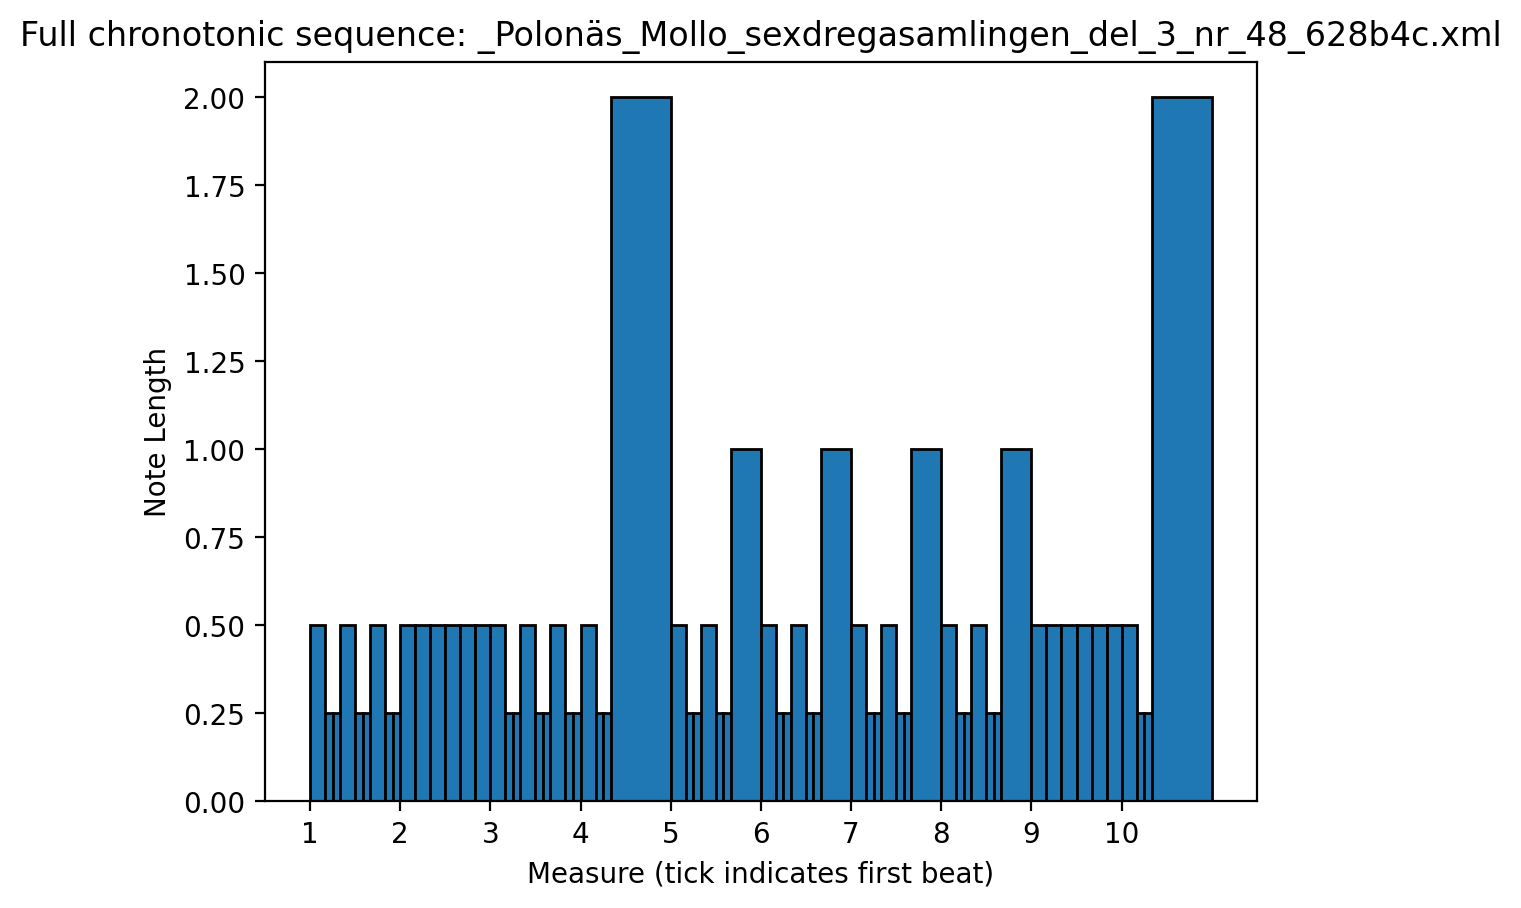

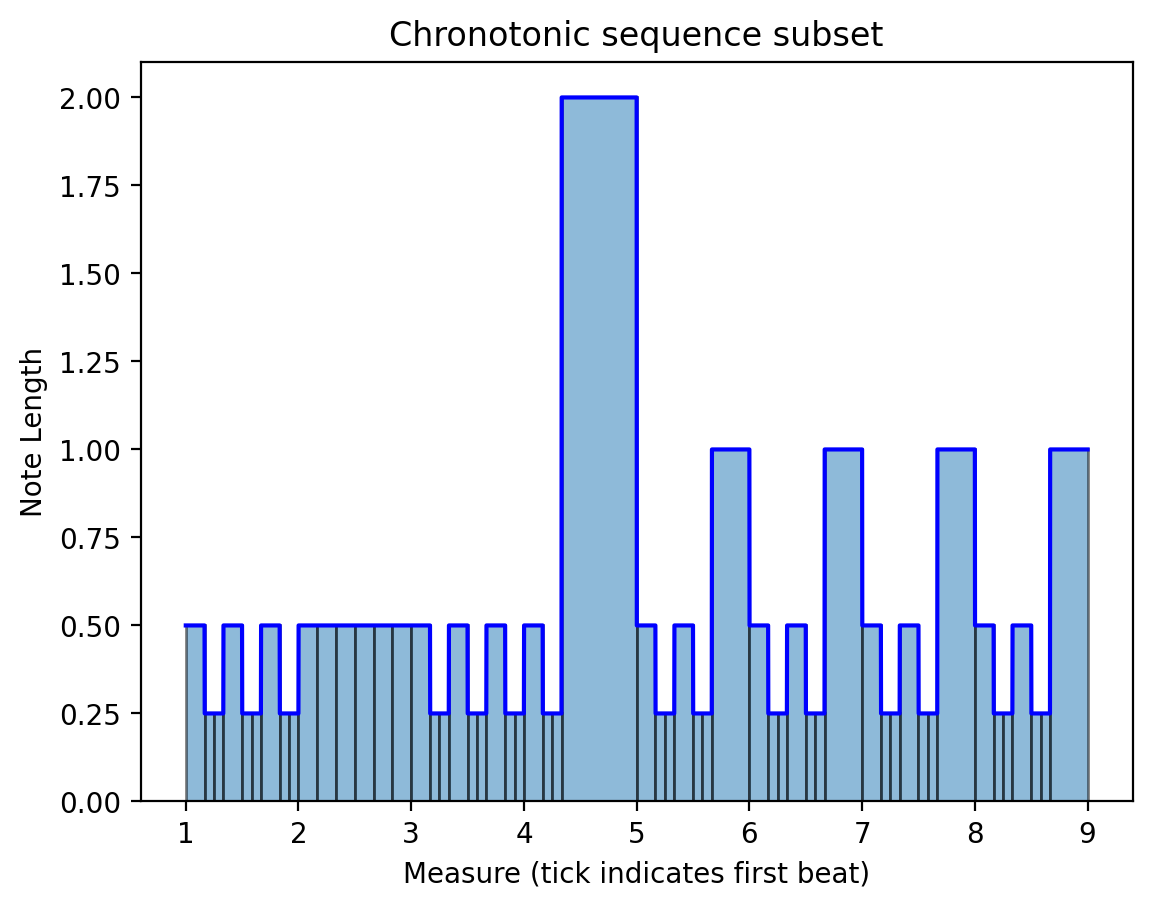

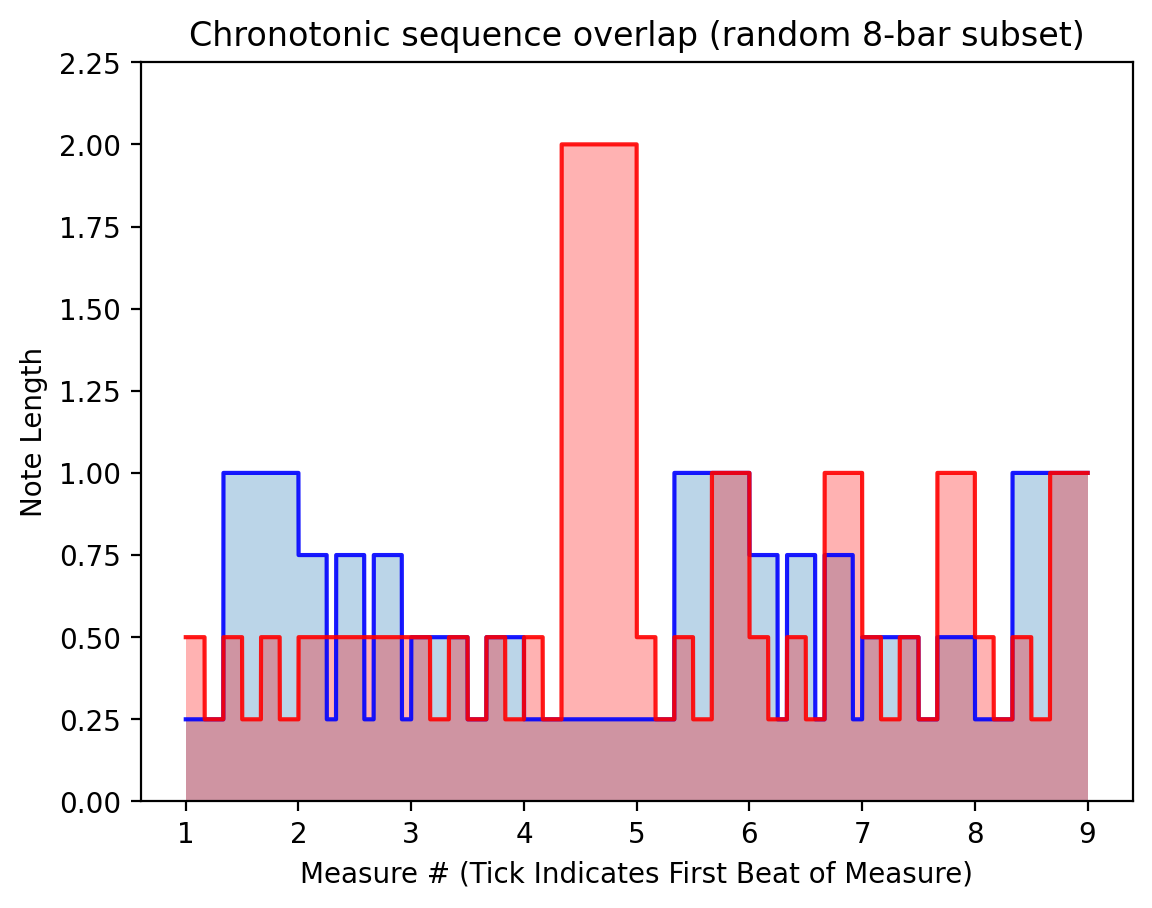

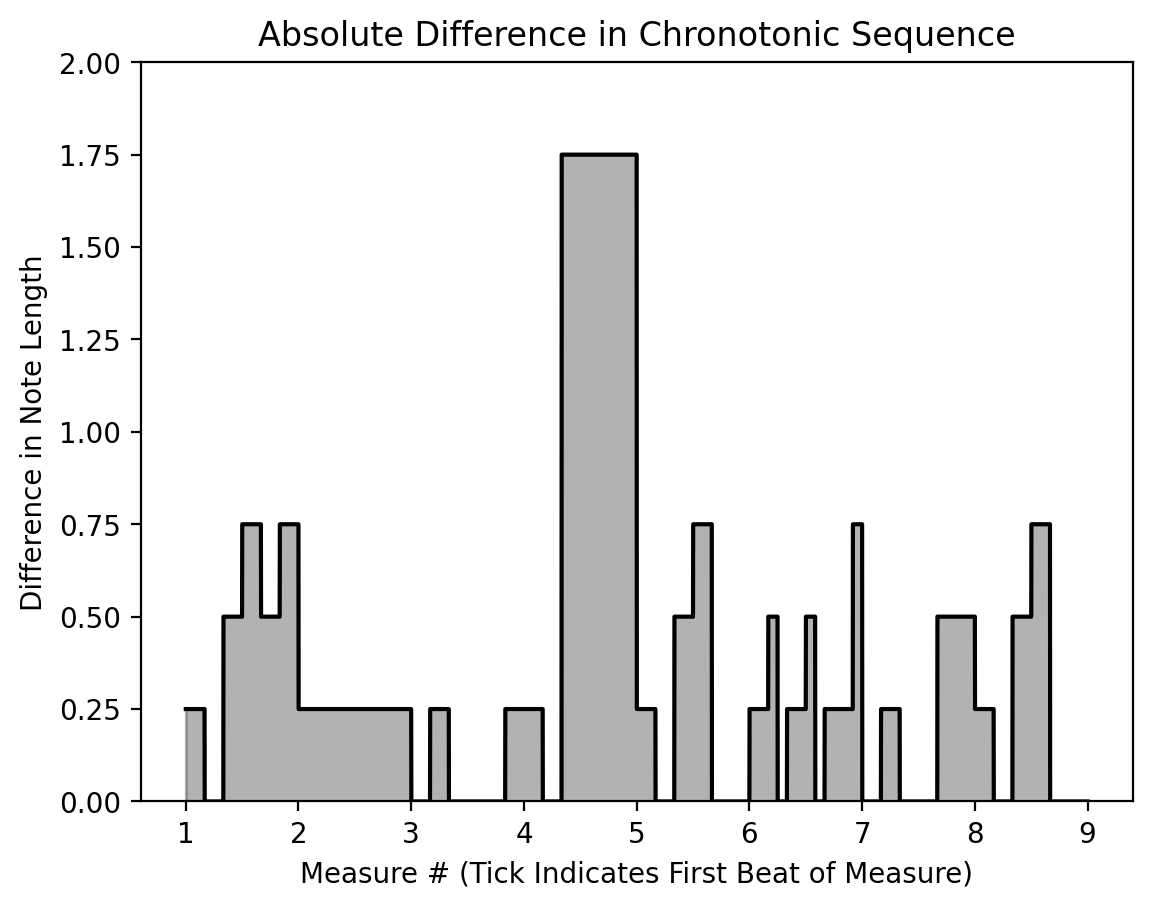

8.997599759975998

In [29]:
# Now, a function that passes in a score name to create the above graphs
# chronotonic_builder('_Polonäs_Mollo_sexdregasamlingen_del_3_nr_48_628b4c.xml', show_graphs=True)
chronotonic_comparison('Pollonesse_183254_460e7c.xml', '_Polonäs_Mollo_sexdregasamlingen_del_3_nr_48_628b4c.xml', subset_start = 1, show_graphs=True)

16 16
0.0
16 10
10.625862586258627
10 16


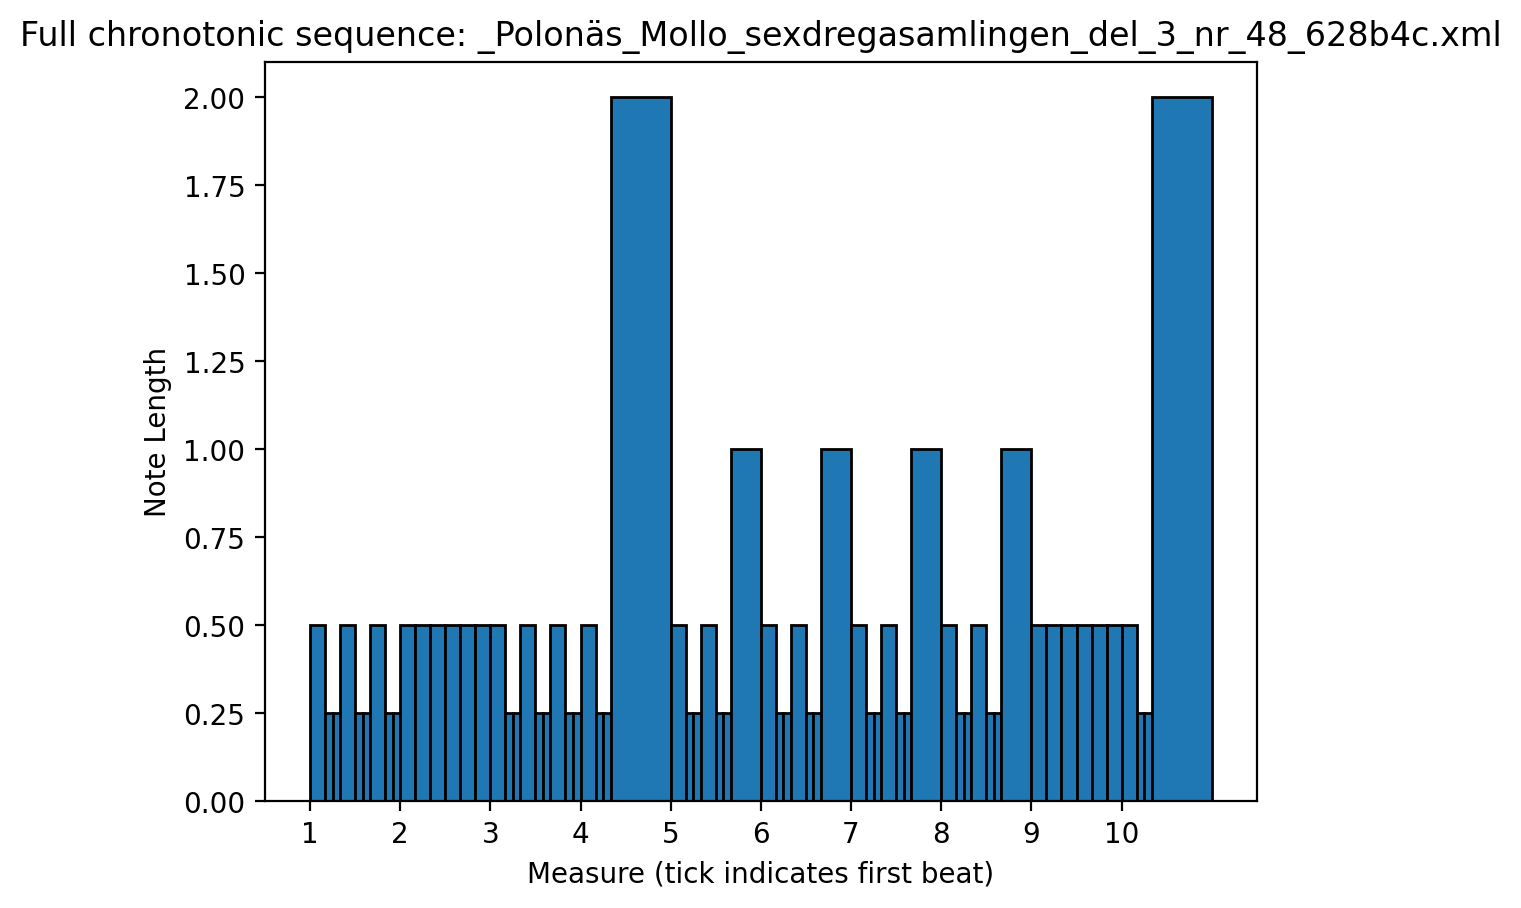

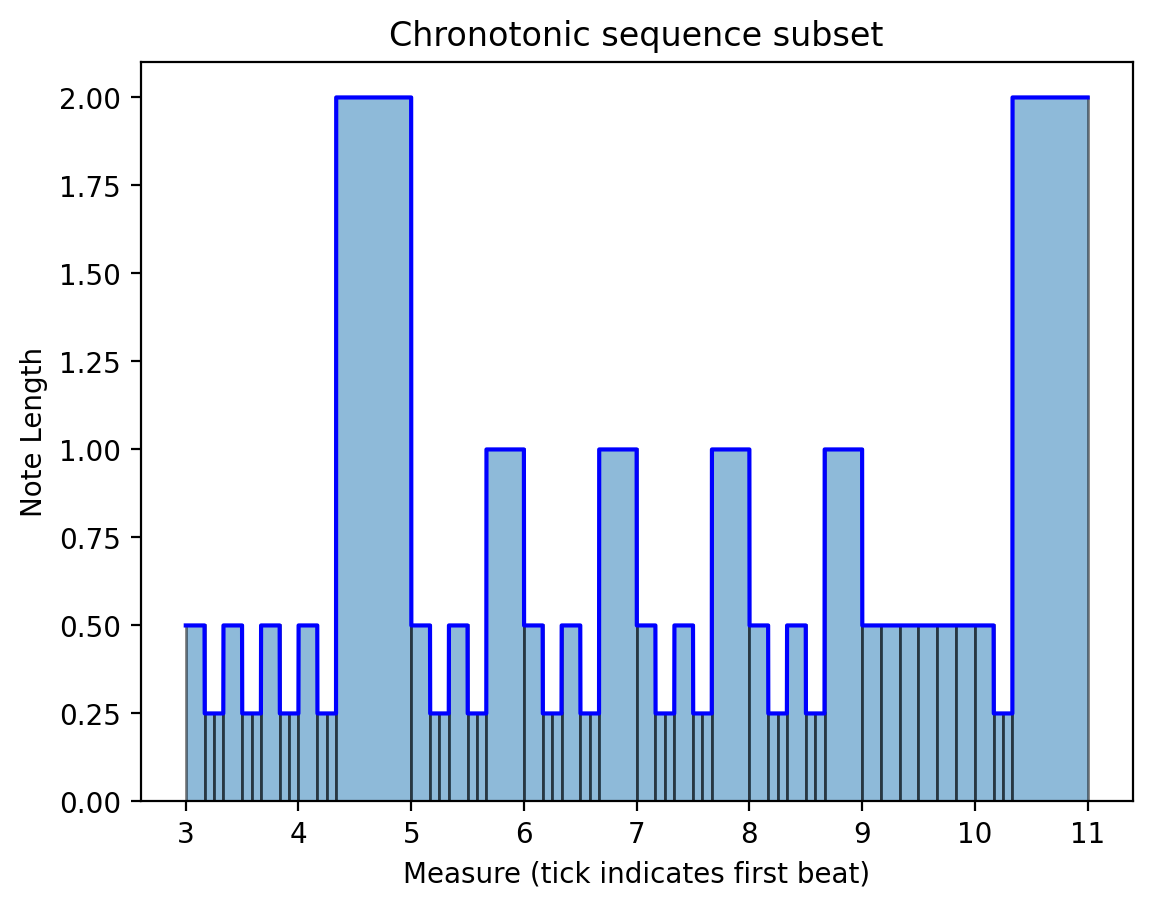

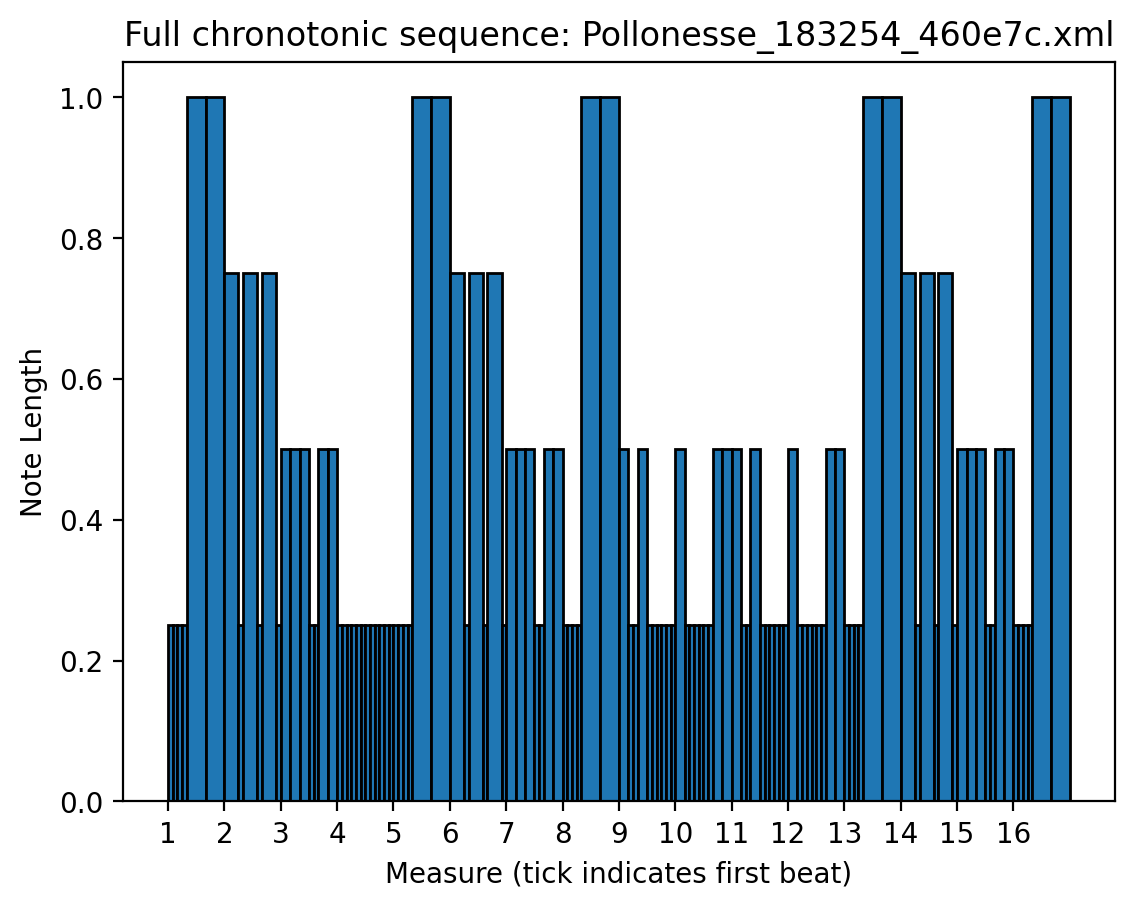

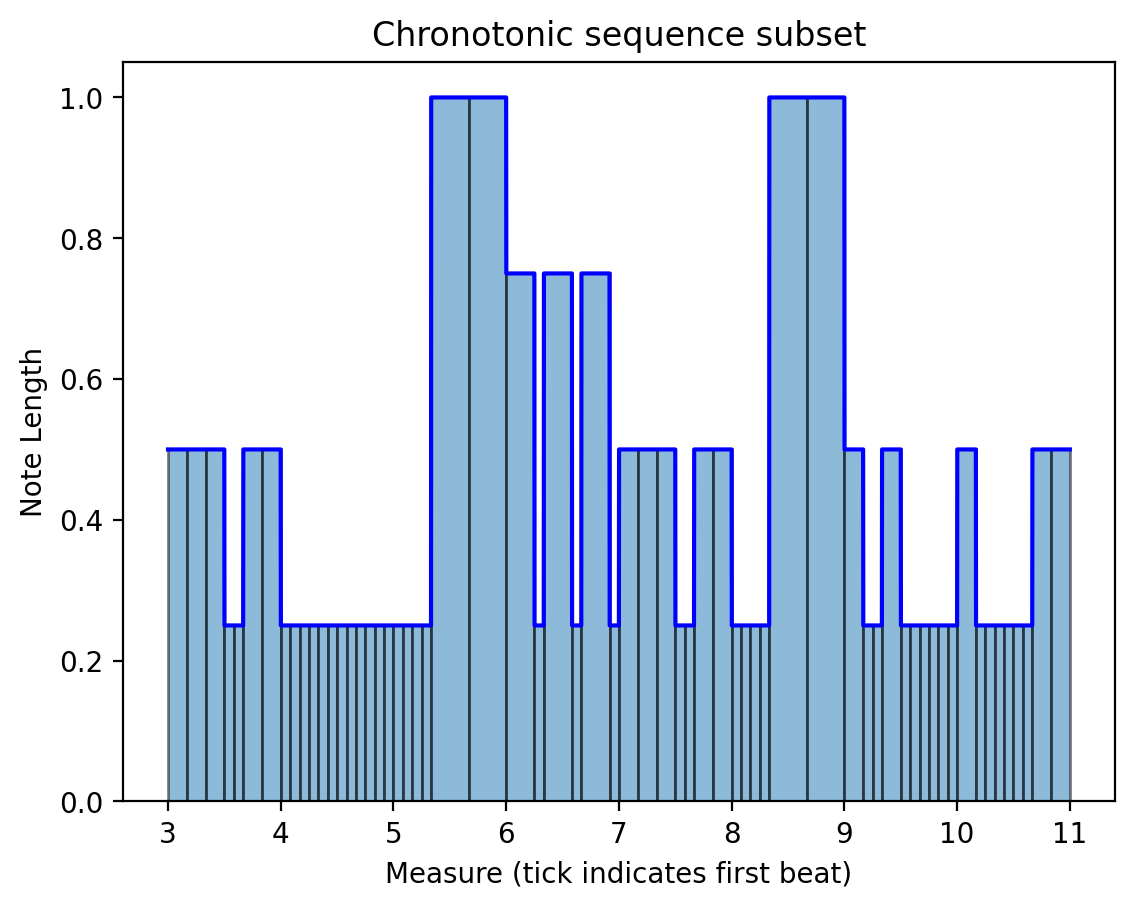

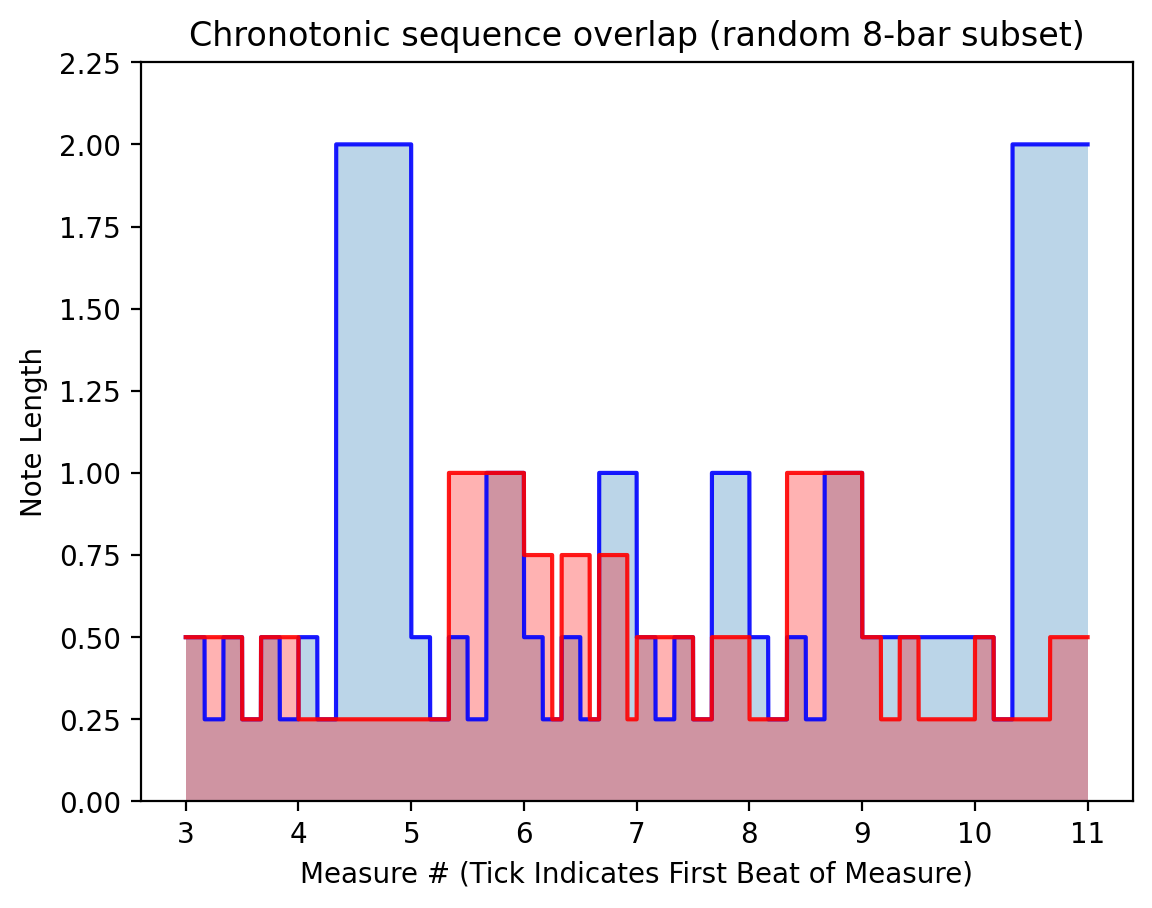

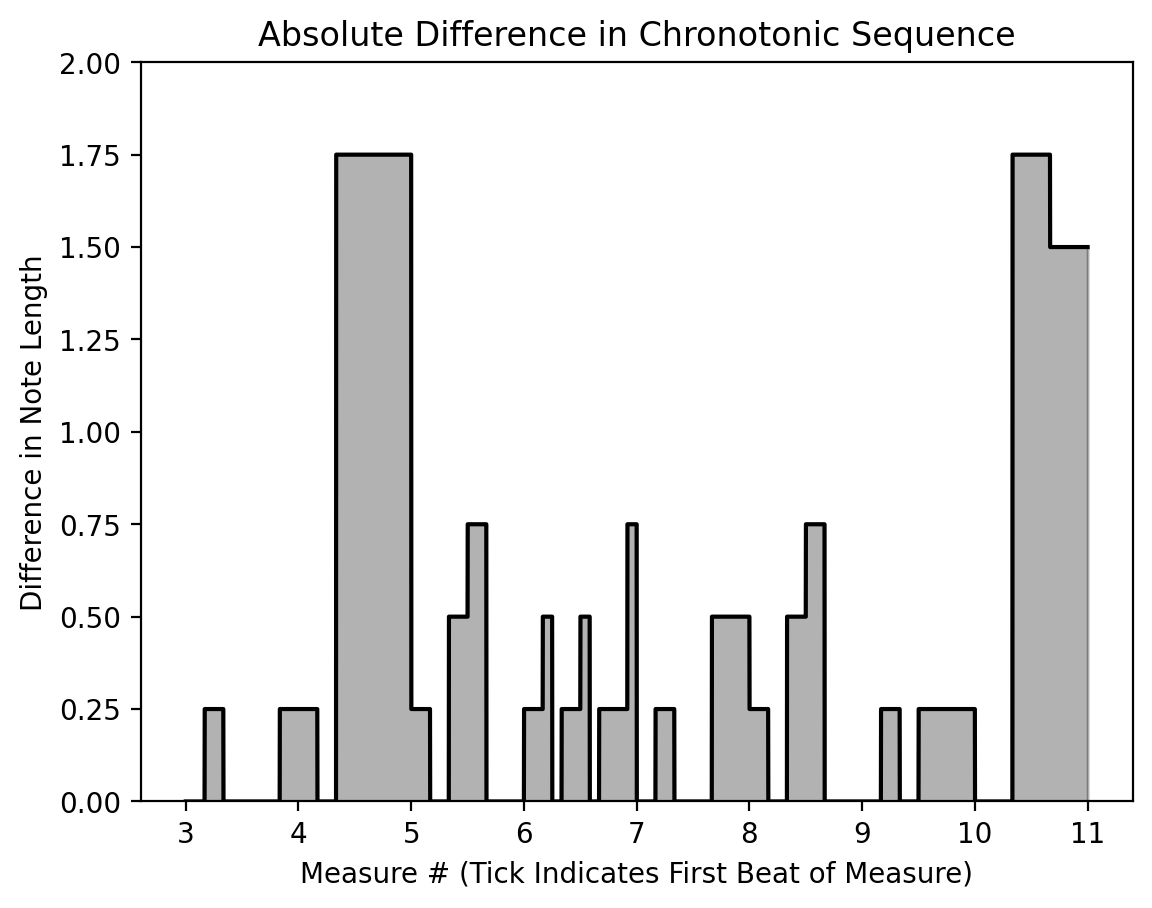

10.625862586258627


In [31]:
# Sense checks
# first must be 0
# second and third should be equal BUT randomness involved in selecting the 8-bar subset to calculate distance from means
# the numbers can differ. The important point is that only +10.625 or +8.997 should pop out.
print(chronotonic_comparison('Pollonesse_183254_460e7c.xml', 'Pollonesse_183254_460e7c.xml',show_graphs=False))
print(chronotonic_comparison('Pollonesse_183254_460e7c.xml', '_Polonäs_Mollo_sexdregasamlingen_del_3_nr_48_628b4c.xml', subset_start = 3, show_graphs=False))
print(chronotonic_comparison('_Polonäs_Mollo_sexdregasamlingen_del_3_nr_48_628b4c.xml', 'Pollonesse_183254_460e7c.xml', subset_start = 3, show_graphs=False))

In [ ]:
# Compute all pairwise distances between all scores in each corpus. Output into two arrays.

In [556]:
# Perform statistical test on resulting distances

import matplotlib.pyplot as plt
import statistics
from math import sqrt
import scipy.stats as st

random_diff = [35, 40, 25, 33, 44, 56, 72, 11, 40]
not_random_diff = [12, 3, 24, 11, 30, 10, 9, 14, 20, 12, 13]

def plot_confidence_interval(x, values, color='#2187bb', horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = st.t.interval(alpha = 0.95, df=len(values)-1, loc=np.mean(values), scale=st.sem(values))

    left = x - horizontal_line_width / 2
    top = max(confidence_interval)
    right = x + horizontal_line_width / 2
    bottom = min(confidence_interval)
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')

    return mean, confidence_interval